In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1890f38472a845d0b8abe0f7d482cd5b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KM8-ELQ6TpvqDe0B0YXfyPqAoEi_Cg8dDbleD44EzRuN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1890f38472a845d0b8abe0f7d482cd5b.get_object(Bucket='ibmhc-donotdelete-pr-ad8l7hkwb0pxzi',Key='tweet_dataset_IBMHC.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Tweets,Polarity,Tweets1,Polarity1
0,I subject people to COVID-19 jokes taking risk...,0.4215,Boris Johnson depends Government over 'lost we...,-0.3182
1,Corona Alert | 03 more tested positive for CO...,0.7251,The government again started imposing #lockdow...,-0.5574
2,Corona virus is the same as in the common cold...,0.0000,Over since the government ceased the lockdown ...,-0.2263
3,If you get covid 19 can we say roonaa got corona,0.0000,The situation in COVID is getting worse even i...,-0.4404
4,Covid-19 is doing their thing ..... The Republ...,-0.8126,With Telangana government pulling the possibil...,-0.4939


In [3]:

body = client_1890f38472a845d0b8abe0f7d482cd5b.get_object(Bucket='ibmhc-donotdelete-pr-ad8l7hkwb0pxzi',Key='emotions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Words,Emotions
0,victimized,cheated
1,accused,cheated
2,acquitted,singled out
3,adorable,loved
4,adored,loved


In [4]:
w = df_data_2.iloc[:,0].values
e= df_data_2.iloc[:,1].values

# Cleaning Tweets column

In [5]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
corpus = []
all_stopwords=stopwords.words('english','german')
all_stopwords.remove('not')
for i in range(0,4000):
    review = re.sub('[^a-zA-Z]',' ',df_data_3['Tweets'][i])#removing all punctuations
    review = review.lower() #lower case conversion
    review = review.split() #converting statement into list of words
    review = [word for word in review if not word in set(all_stopwords)]
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Cleaning Tweets1 column

In [6]:
corpus_1=[]
for i in range(0,4000):
    review_1 = re.sub('[^a-zA-Z]',' ',df_data_3['Tweets1'][i])#removing all punctuations
    review_1 = review_1.lower() #lower case conversion
    review_1 = review_1.split() #converting statement into list of words
    review_1 = [word for word in review_1 if not word in set(all_stopwords)]
    corpus_1.append(review_1)

# Data Analysis

In [7]:
x=df_data_3.iloc[:,1].values
x1=df_data_3.iloc[:,3].values

In [17]:
positive,positive_1=0,0
negative,negative_1=0,0
neutral,neutral_1=0,0
s,s_1=0,0
avg,avg_1=0,0
for i in range(0,4000):
    if x[i]>0.05:
        positive+=1
    if x[i]<=0.05 and x[i]>=-0.05:
        neutral+=1
    if x[i]<-0.05:
        negative+=1
    if x1[i]>0.05:
        positive_1+=1
    if x1[i]<=0.05 and x1[i]>=-0.05:
        neutral_1+=1
    if x1[i]<-0.05:
        negative_1+=1
    s+=x[i]
    s_1+=x1[i]
avg= s/4000
avg_1 = s/4000

In [18]:
emotion_list=[]
emotion_list_1=[]
word=df_data_2.iloc[:,0].values
emotion=df_data_2.iloc[:,1].values
for i in range(0,4000):
    for j in range(0,np.size(word)):
        if word[j] in corpus[i]:
            emotion_list.append(emotion[j])
        if word[j] in corpus_1[i]:
            emotion_list_1.append(emotion[j])
        

In [19]:
from collections import Counter
w=Counter(emotion_list)
w1=Counter(emotion_list_1)
print(w)


Counter({' happy': 114, ' average': 88, ' sad': 78, ' attracted': 73, ' free': 69, ' fearful': 53, ' powerless': 43, ' attached': 25, ' entitled': 25, ' adequate': 24, ' focused': 21, ' lost': 19, ' esteemed': 17, ' fearless': 17, ' alone': 14, ' independent': 14, ' angry': 13, ' surprise': 9, ' hated': 8, ' loved': 8, ' cheated': 6, ' codependent': 4, ' singled out': 4, ' safe': 3, ' anxious': 3, ' embarrassed': 2, ' apathetic': 2, ' obsessed': 1, ' bored': 1, ' derailed': 1})


In [20]:
print(w1)

Counter({' sad': 119, ' happy': 97, ' attracted': 86, ' free': 75, ' average': 48, ' powerless': 47, ' ecstatic': 44, ' adequate': 38, ' fearless': 32, ' lost': 31, ' fearful': 29, ' angry': 28, ' codependent': 26, ' esteemed': 25, ' surprise': 18, ' attached': 12, ' hated': 12, ' singled out': 11, ' focused': 11, ' independent': 11, ' alone': 9, ' entitled': 8, ' cheated': 6, ' loved': 6, ' anxious': 5, ' embarrassed': 4, ' bored': 4, ' demoralized': 4, ' safe': 3, ' apathetic': 2, ' obsessed': 2, ' lustful': 1, ' burdened': 1})


# Data Plotting

In [21]:
plt.rcParams['figure.figsize']=(15,9)

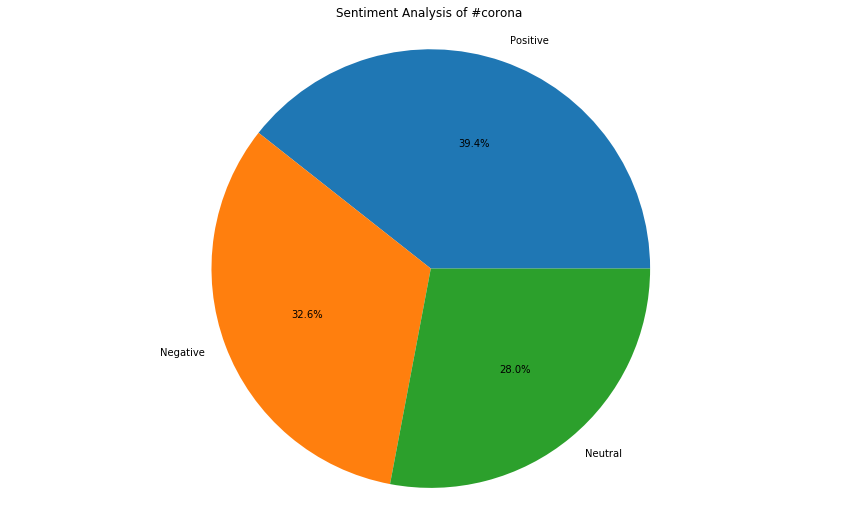

In [22]:
data_1=[positive,negative,neutral]
label_1='Positive','Negative','Neutral'
plt.pie(data_1,labels=label_1,autopct='%1.1f%%')
plt.title('Sentiment Analysis of #corona')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Counts')

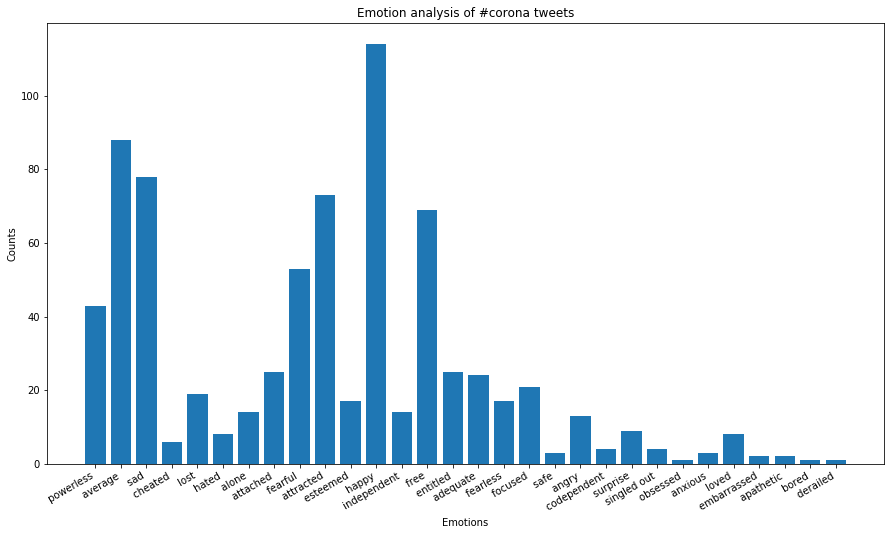

In [23]:
fig1,ax1=plt.subplots()
ax1.bar(w.keys(),w.values())
fig1.autofmt_xdate()
plt.title('Emotion analysis of #corona tweets')
plt.xlabel('Emotions')
plt.ylabel('Counts')

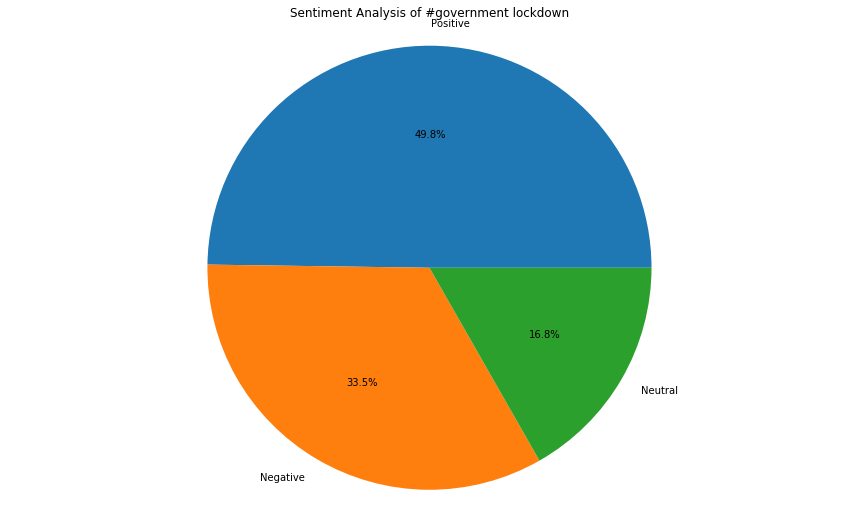

In [24]:
data_2=[positive_1,negative_1,neutral_1]
label_2='Positive','Negative','Neutral'
plt.pie(data_2,labels=label_2,autopct='%1.1f%%')
plt.title('Sentiment Analysis of #government lockdown')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Counts')

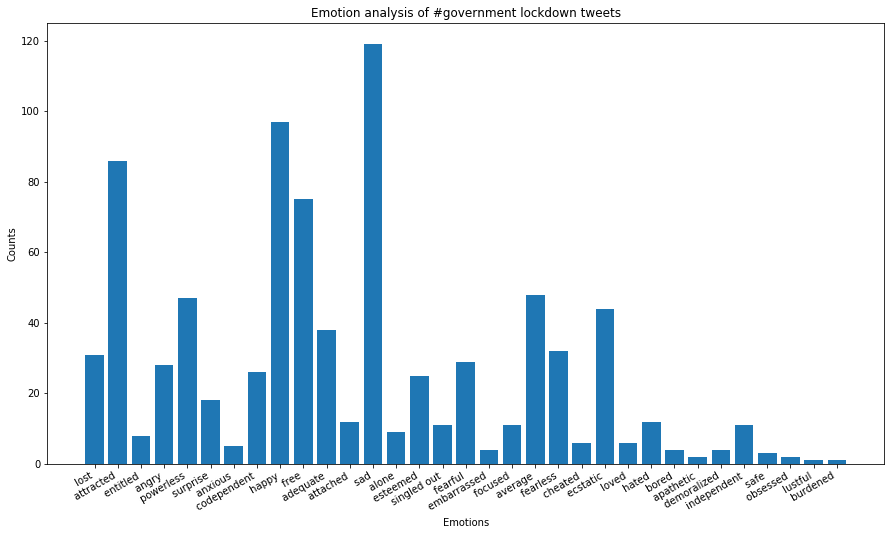

In [25]:
fig1,ax1=plt.subplots()
ax1.bar(w1.keys(),w1.values())
fig1.autofmt_xdate()
plt.title('Emotion analysis of #government lockdown tweets')
plt.xlabel('Emotions')
plt.ylabel('Counts')